In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(678)
tf.set_random_seed(678)
config = tf.ConfigProto(device_count = {'GPU': 0})
sess = tf.InteractiveSession(config=config)

# create data
global  test_data

# (# of Images, Width of Image, Height of Image, # of channels)
# 30개의 32x32 grey scale 이미지를 만든다.
test_data = np.zeros((30,32,32,1))

for i in range(30):
    new_random_image = np.random.randn(32,32) * np.random.randint(5) + np.random.randint(60)
    new_random_image = np.expand_dims(new_random_image,axis=2)
    test_data[i,:,:,:] = new_random_image

# Show Sample Data here and there
# 아래 plt.imshow()에서 데이터 범위는 아래에서 보듯이 대략 24에서 30사이로 나오는데 30을 완전 하얀색으로 24를 완전 어두운색으로 자동으로 맞춰주는듯하다.
# 좀더 보니까 첫번째 데이터 범위가 24에서 30이고 전체적으로 보면 -12에서 60정도 사이로 나오는듯하다(정규분포에서 outlier)
plt.imshow(np.squeeze(test_data[0]),cmap='gray')
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
test_data[0].shape

(32, 32, 1)

In [3]:
test_data[6].max()

43.0


 first data ===================
Data Shape:  (32, 32, 1)
Data Max:  30.27036659452075
Data Min:  24.11698056353385
Data Mean:  27.023666788545853
Data Variance:  1.0188907097582078


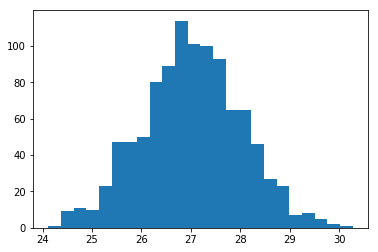


 whole data ===================
Data Shape:  (30, 32, 32, 1)
Data Max:  61.52929061373403
Data Min:  -12.197120707418833
Data Mean:  26.224319678299548
Data Variance:  306.3597026759282


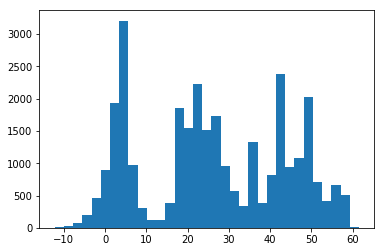

In [4]:

# 0.Print the information about the given batch of image
print('\n first data ===================')
print("Data Shape: ",test_data[0].shape)
print("Data Max: ",test_data[0].max())
print("Data Min: ",test_data[0].min())
print("Data Mean: ",test_data[0].mean())
print("Data Variance: ",test_data[0].var())
plt.hist(test_data[0].flatten() ,bins='auto')
plt.show()
print('\n whole data ===================')
print("Data Shape: ",test_data.shape)
print("Data Max: ",test_data.max())
print("Data Min: ",test_data.min())
print("Data Mean: ",test_data.mean())
print("Data Variance: ",test_data.var())
plt.hist(test_data.flatten() ,bins='auto')
plt.show()
print('=================================')


하나의 이미지는 정규분포를 따르지만, 전체 이미지는 이미지당 정규분포 생성후 bias를 서로 다르게 줬기 때문에 위처럼 약간 랜덤성을 띈다

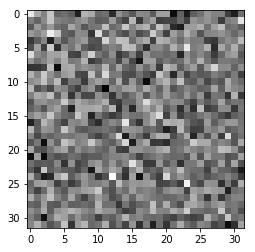

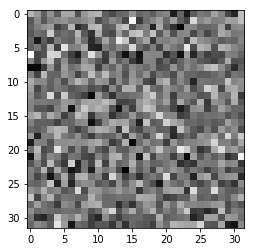

============== Case 1 first image ===================
Data Shape:  (32, 32, 1)
Data Max:  0.5872262302205795
Data Min:  0.40502387918516364
Data Mean:  0.4890182913870834
Data Variance:  0.0009756395608854019


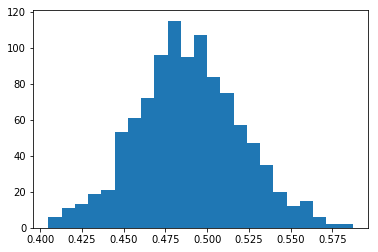

============== Case 1 whole ===================
Data Shape:  (30, 32, 32, 1)
Data Max:  1.0
Data Min:  0.0
Data Mean:  0.47555583269505924
Data Variance:  0.08945512117614675


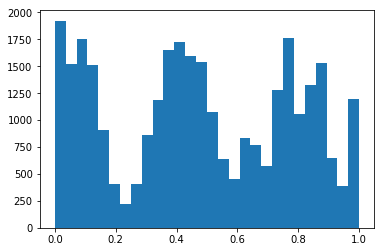

In [5]:
# normalization은 모든 데이터의 범위를 [0,1]로 조정하는걸 의미한다.
# http://sevity.tistory.com/47
def case_1_normalize():
    
    global test_data

    # 근데 이미지 한장한장이 아니라 30장 전체의 모든 픽셀에 대해서 한번에 적용하고 있네 ㄷ
    # ML관점에서 보면 30장이 하나의 mini_batch size라고 보면 배치안의 모든데이터에 대해서 적용하고 있는 셈
    step_1 = (test_data - test_data.min(axis=0)) / (test_data.max(axis=0) - test_data.min(axis=0))
    plt.imshow(np.squeeze(test_data[0]),cmap='gray')
    plt.show()

    plt.imshow(np.squeeze(step_1[0]),cmap='gray')
    plt.show()

    print('============== Case 1 first image ===================')
    print("Data Shape: ",step_1[0].shape)
    print("Data Max: ",step_1[0].max())
    print("Data Min: ",step_1[0].min())
    print("Data Mean: ",step_1[0].mean())
    print("Data Variance: ",step_1[0].var())
    plt.hist(step_1[0].flatten() ,bins='auto')
    plt.show()
    print('============== Case 1 whole ===================')
    print("Data Shape: ",step_1.shape)
    print("Data Max: ",step_1.max())
    print("Data Min: ",step_1.min())
    print("Data Mean: ",step_1.mean())
    print("Data Variance: ",step_1.var())
    plt.hist(step_1.flatten() ,bins='auto')
    plt.show()
    print('=================================')
case_1_normalize()

위에서 실제로 max, min이 [0,1]범위에 들어왔음을 볼 수 있다.
근데 첫번째 히스토그램만 봤을때 히스트로그램이 normalization과 동일하지 않은 이유는 whole data에 대해서 적용했기 때문인것 같다.
근데 두번째 히스토그램에서 양쪽 끝값이 왜이렇게 많지? ㄷ ㄷ ㄷ

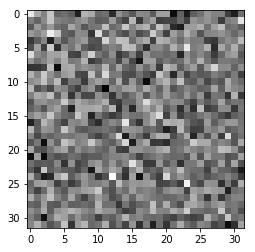

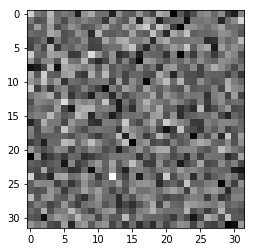

============== Case2 first image  ===================
Data Shape:  (32, 32, 1)
Data Max:  0.27729666312639467
Data Min:  -0.12804664175221322
Data Mean:  0.045712640066477336
Data Variance:  0.004049832130319628


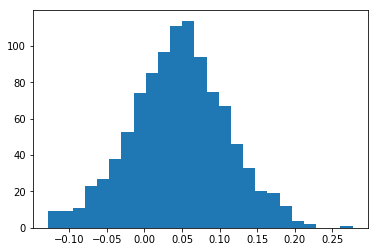

============== Case2 whole  ===================
Data Shape:  (30, 32, 32, 1)
Data Max:  2.01043528368016
Data Min:  -2.1311552193181345
Data Mean:  -2.960594732333751e-17
Data Variance:  1.0


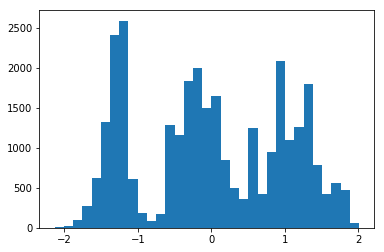

In [6]:
def case_2_Standardization():
    global test_data

    case_2 = (test_data - test_data.mean(axis=0)) / test_data.std(axis=0)
    plt.imshow(np.squeeze(test_data[0]),cmap='gray')
    plt.show()

    plt.imshow(np.squeeze(case_2[0]),cmap='gray')
    plt.show()

    print('============== Case2 first image  ===================')
    print("Data Shape: ",case_2[0].shape)
    print("Data Max: ",case_2[0].max())
    print("Data Min: ",case_2[0].min())
    print("Data Mean: ",case_2[0].mean())
    print("Data Variance: ",case_2[0].var())
    plt.hist(case_2[0].flatten() ,bins='auto')
    plt.show()
    print('============== Case2 whole  ===================')
    print("Data Shape: ",case_2.shape)
    print("Data Max: ",case_2.max())
    print("Data Min: ",case_2.min())
    print("Data Mean: ",case_2.mean())
    print("Data Variance: ",case_2.var())
    plt.hist(case_2.flatten() ,bins='auto')
    plt.show()
    print('=================================')
case_2_Standardization()


위에서 실제로 mean이 0, 표준편차가 1로 조정됐음을 볼 수 있다. 하지만 전체에 대해서고 특정 이미지에 대해서는 아님에 주의

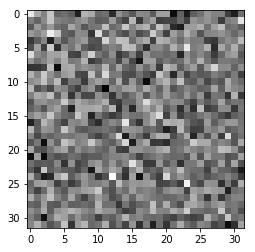

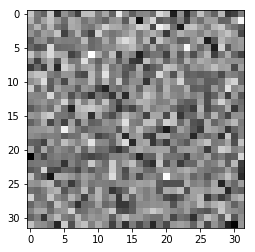


============== Case 3 Implementation ===================
Data Shape:  (10, 32, 32, 1)
Data Max:  2.2205707955994916
Data Min:  -2.0285901524227303
Data Mean:  -1.1102230246251566e-17
Data Variance:  0.9999999999517349


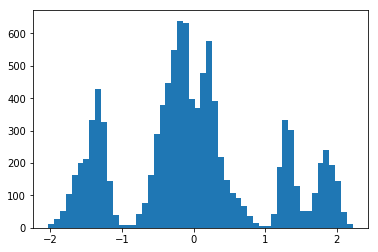

In [7]:
# --------- case 3 batch normalize first 10------
def case_3_batch_norm_implement():
    
    global test_data
    case3_data = test_data[:10,:,:,:]

    mini_batch_mean = case3_data.sum(axis=0) / len(case3_data)
    mini_batch_var = ((case3_data-mini_batch_mean) ** 2).sum(axis=0) / len(case3_data)
    case_3 = (case3_data-mini_batch_mean)/ ( (mini_batch_var + 1e-8) ** 0.5 )

    plt.imshow(np.squeeze(test_data[0]),cmap='gray')
    plt.show()

    plt.imshow(np.squeeze(case_3[0]),cmap='gray')
    plt.show()

    print('\n=================================')
    print('============== Case 3 Implementation ===================')
    print("Data Shape: ",case_3.shape)
    print("Data Max: ",case_3.max())
    print("Data Min: ",case_3.min())
    print("Data Mean: ",case_3.mean())
    print("Data Variance: ",case_3.var())
    plt.hist(case_3.flatten() ,bins='auto')
    plt.show()
    print('=================================')
case_3_batch_norm_implement()

In [8]:
case3_data = test_data[:10,:,:,:]
mini_batch_mean = case3_data.sum(axis=0) / len(case3_data)


In [9]:
a = case3_data

In [10]:
a.shape

(10, 32, 32, 1)

In [11]:
a.sum()

246596.36139414695

In [12]:
a.sum(axis=0).shape

(32, 32, 1)

In [13]:
a.sum(axis=0)

array([[[247.20831529],
        [253.26060011],
        [253.79037298],
        ...,
        [248.2295737 ],
        [238.32728846],
        [241.2258804 ]],

       [[229.9914738 ],
        [238.43595721],
        [238.26327658],
        ...,
        [250.04239546],
        [229.96672011],
        [233.39738295]],

       [[233.03643249],
        [236.48688127],
        [241.22125066],
        ...,
        [237.84186282],
        [242.53625205],
        [245.85363566]],

       ...,

       [[245.89487367],
        [229.02323315],
        [245.70229165],
        ...,
        [231.55368339],
        [241.1851144 ],
        [230.51615904]],

       [[252.01869446],
        [236.78585359],
        [238.14269399],
        ...,
        [240.73649988],
        [250.34644063],
        [238.51774612]],

       [[230.34564503],
        [249.90502842],
        [240.54800942],
        ...,
        [243.05215123],
        [260.81218891],
        [246.74093075]]])

오호.. 진짜로 layer가 아니라 배치간에 먼저 sum을 하네 

In [14]:
a = case3_data.sum(axis=0) / len(case3_data)

In [15]:
a.shape

(32, 32, 1)

In [16]:
len(case3_data)

10

In [17]:
a

array([[[24.72083153],
        [25.32606001],
        [25.3790373 ],
        ...,
        [24.82295737],
        [23.83272885],
        [24.12258804]],

       [[22.99914738],
        [23.84359572],
        [23.82632766],
        ...,
        [25.00423955],
        [22.99667201],
        [23.3397383 ]],

       [[23.30364325],
        [23.64868813],
        [24.12212507],
        ...,
        [23.78418628],
        [24.25362521],
        [24.58536357]],

       ...,

       [[24.58948737],
        [22.90232331],
        [24.57022917],
        ...,
        [23.15536834],
        [24.11851144],
        [23.0516159 ]],

       [[25.20186945],
        [23.67858536],
        [23.8142694 ],
        ...,
        [24.07364999],
        [25.03464406],
        [23.85177461]],

       [[23.0345645 ],
        [24.99050284],
        [24.05480094],
        ...,
        [24.30521512],
        [26.08121889],
        [24.67409307]]])

layer안에서 노드간이 아니라 배치간 sum후에 평균까지 내는구나

In [18]:
    mini_batch_mean = case3_data.sum(axis=0) / len(case3_data)
    mini_batch_var = ((case3_data-mini_batch_mean) ** 2).sum(axis=0) / len(case3_data)

In [19]:
a = ((case3_data-mini_batch_mean) ** 2)
a

array([[[[2.50562047e+01],
         [8.20749888e+00],
         [3.66642613e+00],
         ...,
         [6.22470262e-01],
         [1.06848983e+00],
         [7.11980418e+00]],

        [[1.72288726e+01],
         [7.29830486e+00],
         [1.32647981e+01],
         ...,
         [4.51410869e+00],
         [1.92554448e+01],
         [3.89910678e+01]],

        [[8.86727528e+00],
         [1.77786225e+01],
         [8.25040104e+00],
         ...,
         [8.44506288e+00],
         [7.35831604e+00],
         [3.16923988e+00]],

        ...,

        [[8.96734622e+00],
         [1.68469968e+01],
         [1.33961462e+01],
         ...,
         [1.09647067e+01],
         [8.53137474e+00],
         [9.01926130e+00]],

        [[3.92961276e+00],
         [7.71336018e+00],
         [5.36938701e-01],
         ...,
         [2.29185394e+01],
         [2.89988746e+00],
         [9.83631641e+00]],

        [[1.87884504e+01],
         [1.14147488e+01],
         [9.76687294e+00],
         ...,
 

In [20]:
a.shape

(10, 32, 32, 1)

In [21]:
a = ((case3_data-mini_batch_mean) ** 2).sum(axis=0)
a

array([[[2218.26690444],
        [2366.58676361],
        [1866.44489807],
        ...,
        [2504.36145708],
        [2020.59244501],
        [1931.52535676]],

       [[1946.68238978],
        [2369.74766146],
        [1846.31960604],
        ...,
        [2095.79885126],
        [2357.74293834],
        [2110.01742031]],

       [[2032.75333592],
        [1966.28537158],
        [2266.17417805],
        ...,
        [1950.06349665],
        [2604.71546058],
        [2059.01477453]],

       ...,

       [[2218.42539494],
        [2332.16410336],
        [1791.40458643],
        ...,
        [1968.65663022],
        [1726.71242922],
        [2229.71133052]],

       [[1969.9660397 ],
        [2029.85021884],
        [2119.97933591],
        ...,
        [1942.71048993],
        [2253.75448751],
        [1853.17725788]],

       [[1786.02730956],
        [2136.72319443],
        [1960.29365426],
        ...,
        [1817.3189173 ],
        [2391.8749995 ],
        [1972.58579608]]

In [22]:
a.shape

(32, 32, 1)

그담에 각 node에서 batch_mean을 빼고 제곱한다음에 다시 평균을 내는데

지금까지 전부다 layer안에서 node간 연산한건 없고 죄다 배치간 연산이다

In [23]:
mini_batch_mean = case3_data.sum(axis=0) / len(case3_data)
mini_batch_var = ((case3_data-mini_batch_mean) ** 2).sum(axis=0) / len(case3_data)
mini_batch_var

array([[[221.82669044],
        [236.65867636],
        [186.64448981],
        ...,
        [250.43614571],
        [202.0592445 ],
        [193.15253568]],

       [[194.66823898],
        [236.97476615],
        [184.6319606 ],
        ...,
        [209.57988513],
        [235.77429383],
        [211.00174203]],

       [[203.27533359],
        [196.62853716],
        [226.61741781],
        ...,
        [195.00634966],
        [260.47154606],
        [205.90147745]],

       ...,

       [[221.84253949],
        [233.21641034],
        [179.14045864],
        ...,
        [196.86566302],
        [172.67124292],
        [222.97113305]],

       [[196.99660397],
        [202.98502188],
        [211.99793359],
        ...,
        [194.27104899],
        [225.37544875],
        [185.31772579]],

       [[178.60273096],
        [213.67231944],
        [196.02936543],
        ...,
        [181.73189173],
        [239.18749995],
        [197.25857961]]])

In [24]:
mini_batch_mean = case3_data.sum(axis=0) / len(case3_data)
mini_batch_var = ((case3_data-mini_batch_mean) ** 2).sum(axis=0) / len(case3_data)
case_3 = (case3_data-mini_batch_mean)/ ( (mini_batch_var + 1e-8) ** 0.5 )
case_3

array([[[[ 0.33608625],
         [ 0.18622767],
         [ 0.14015671],
         ...,
         [ 0.04985524],
         [ 0.07271865],
         [ 0.1919923 ]],

        [[ 0.29749583],
         [ 0.17549306],
         [ 0.26803832],
         ...,
         [ 0.14676118],
         [ 0.28577784],
         [ 0.42987238]],

        [[ 0.20885879],
         [ 0.3006947 ],
         [ 0.1908055 ],
         ...,
         [ 0.20810239],
         [ 0.1680773 ],
         [ 0.12406458]],

        ...,

        [[ 0.20105254],
         [ 0.26877056],
         [ 0.27345955],
         ...,
         [ 0.23600083],
         [ 0.22227955],
         [ 0.20112273]],

        [[ 0.14123603],
         [ 0.19493499],
         [ 0.05032648],
         ...,
         [ 0.34347049],
         [ 0.11343244],
         [ 0.23038689]],

        [[ 0.32434069],
         [ 0.23113145],
         [ 0.22321183],
         ...,
         [ 0.0089039 ],
         [-0.05162396],
         [ 0.24269004]]],


       [[[-0.12554555],


In [25]:
case_3.shape

(10, 32, 32, 1)

위에서 구한 분산같은걸 루트씌워서 표준편차 같은걸 구해서 z-scoring 같은걸 해주는구나..

근데 끝까지 layer안에서 node간 연산은 없네

그리고 감마랑 베타 어디갔지? 스케일과 쉬프트 부분이 빠진거 같은데??